Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set Seed
np.random.seed(2021)

#Reading the data & renaming col for ease of understanding

In [3]:
energy =pd.read_csv(r"C:\Users\Ami\Desktop\ML Python\Energy UCI\energydata_complete.csv",parse_dates=['date'])

#changing col names
energy = energy.rename(columns = {'date' : 'date', 'Appliances' : 'app_energy', 'lights' : 'light_energy', \
                             'T1' : 'kitchen_t', 'RH_1' : 'kitchen_h', 'T2' : 'liv_t', 'RH_2' : 'liv_h',\
                             'T3' : 'laun_t', 'RH_3' : 'laun_h', 'T4' : 'off_t', 'RH_4' : 'off_hum',\
                             'T5' : 'bath_t', 'RH_5' : 'bath_h', 'T6' : 'out_build_t', \
                             'RH_6' : 'out_build_h', 'T7' : 'iron_t','RH_7' : 'iron_h', 'T8' : 'teen_t', \
                             'RH_8' : 'teen_h', 'T9' : 'par_t','RH_9' : 'par_h', 'T_out' : 'out_t', \
                             'Press_mm_hg' : 'out_press', 'RH_out' : 'out_h', \
                             'Windspeed' : 'wind', 'Visibility' : 'visibility', 'Tdewpoint' : 'dew_point', \
                             'rv1' : 'rv1', 'rv2' : 'rv2'})

energy_1=energy               #creating a copy of the original dataset with new col names
print(energy.shape)           #see the number of rows and cols

(19735, 29)


#Exploratory Data Analysis

In [4]:
energy_1.info()               #see data types of attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date            19735 non-null datetime64[ns]
app_energy      19735 non-null int64
light_energy    19735 non-null int64
kitchen_t       19735 non-null float64
kitchen_h       19735 non-null float64
liv_t           19735 non-null float64
liv_h           19735 non-null float64
laun_t          19735 non-null float64
laun_h          19735 non-null float64
off_t           19735 non-null float64
off_hum         19735 non-null float64
bath_t          19735 non-null float64
bath_h          19735 non-null float64
out_build_t     19735 non-null float64
out_build_h     19735 non-null float64
iron_t          19735 non-null float64
iron_h          19735 non-null float64
teen_t          19735 non-null float64
teen_h          19735 non-null float64
par_t           19735 non-null float64
par_h           19735 non-null float64
out_t           19735 non-null float64
out_press       19735 non-null

In [5]:
energy.isnull().sum()            #check for null values

date            0
app_energy      0
light_energy    0
kitchen_t       0
kitchen_h       0
liv_t           0
liv_h           0
laun_t          0
laun_h          0
off_t           0
off_hum         0
bath_t          0
bath_h          0
out_build_t     0
out_build_h     0
iron_t          0
iron_h          0
teen_t          0
teen_h          0
par_t           0
par_h           0
out_t           0
out_press       0
out_h           0
wind            0
visibility      0
dew_point       0
rv1             0
rv2             0
dtype: int64

#Preparing and further exploring the dataset

In [6]:
#setting the date col as index
energy = energy.set_index('date')

energy.shape              #date col converted to index hence one row reduced

(19735, 28)

In [7]:
#creating new cols for date time based analysis
energy['month'] = energy.index.month
energy['weekday'] = energy.index.weekday
energy['hour'] = energy.index.hour
energy['week'] = energy.index.week

energy.shape                #four cols added

(19735, 32)

In [8]:
energy.head(10)

app_energy  light_energy  kitchen_t  kitchen_h  liv_t  \
date                                                                         
2016-01-11 17:00:00          60            30  19.890000  47.596667  19.20   
2016-01-11 17:10:00          60            30  19.890000  46.693333  19.20   
2016-01-11 17:20:00          50            30  19.890000  46.300000  19.20   
2016-01-11 17:30:00          50            40  19.890000  46.066667  19.20   
2016-01-11 17:40:00          60            40  19.890000  46.333333  19.20   
2016-01-11 17:50:00          50            40  19.890000  46.026667  19.20   
2016-01-11 18:00:00          60            50  19.890000  45.766667  19.20   
2016-01-11 18:10:00          60            50  19.856667  45.560000  19.20   
2016-01-11 18:20:00          60            40  19.790000  45.597500  19.20   
2016-01-11 18:30:00          70            40  19.856667  46.090000  19.23   

                         liv_h  laun_t     laun_h      off_t    off_hum  ...  \
date                                                                     ...   
2016-01-11 17:00:00  44.790000   19.79  44.730000  19.000000  45.566667  ...   
2016-01-11 17:10:00  44.722500   19.79  44.790000  19.000000  45.992500  ...   
2016-01-11 17:20:00  44.626667   19.79  44.933333  18.926667  45.890000  ...   
2016-01-11 17:30:00  44.590000   19.79  45.000000  18.890000  45.723333  ...   
2016-01-11 17:40:00  44.530000   19.79  45.000000  18.890000  45.530000  ...   
2016-01-11 17:50:00  44.500000   19.79  44.933333  18.890000  45.730000  ...   
2016-01-11 18:00:00  44.500000   19.79  44.900000  18.890000  45.790000  ...   
2016-01-11 18:10:00  44.500000   19.73  44.900000  18.890000  45.863333  ...   
2016-01-11 18:20:00  44.433333   19.73  44.790000  18.890000  45.790000  ...   
2016-01-11 18:30:00  44.400000   19.79  44.863333  18.890000  46.096667  ...   

                         out_h      wind  visibility  dew_point        rv1  \
date                                                                         
2016-01-11 17:00:00  92.000000  7.000000   63.000000   5.300000  13.275433   
2016-01-11 17:10:00  92.000000  6.666667   59.166667   5.200000  18.606195   
2016-01-11 17:20:00  92.000000  6.333333   55.333333   5.100000  28.642668   
2016-01-11 17:30:00  92.000000  6.000000   51.500000   5.000000  45.410389   
2016-01-11 17:40:00  92.000000  5.666667   47.666667   4.900000  10.084097   
2016-01-11 17:50:00  92.000000  5.333333   43.833333   4.800000  44.919484   
2016-01-11 18:00:00  92.000000  5.000000   40.000000   4.700000  47.233763   
2016-01-11 18:10:00  91.833333  5.166667   40.000000   4.683333  33.039890   
2016-01-11 18:20:00  91.666667  5.333333   40.000000   4.666667  31.455702   
2016-01-11 18:30:00  91.500000  5.500000   40.000000   4.650000   3.089314   

                           rv2  month  weekday  hour  week  
date                                                        
2016-01-11 17:00:00  13.275433      1        0    17     2  
2016-01-11 17:10:00  18.606195      1        0    17     2  
2016-01-11 17:20:00  28.642668      1        0    17     2  
2016-01-11 17:30:00  45.410389      1        0    17     2  
2016-01-11 17:40:00  10.084097      1        0    17     2  
2016-01-11 17:50:00  44.919484      1        0    17     2  
2016-01-11 18:00:00  47.233763      1        0    18     2  
2016-01-11 18:10:00  33.039890      1        0    18     2  
2016-01-11 18:20:00  31.455702      1        0    18     2  
2016-01-11 18:30:00   3.089314      1        0    18     2  

[10 rows x 32 columns]

In [9]:
energy.tail(10)

app_energy  light_energy  kitchen_t  kitchen_h  \
date                                                                  
2016-05-27 16:30:00         220             0  25.426667  46.060000   
2016-05-27 16:40:00         180             0  25.500000  46.530000   
2016-05-27 16:50:00         120             0  25.500000  47.456667   
2016-05-27 17:00:00         110             0  25.600000  47.193333   
2016-05-27 17:10:00          90             0  25.533333  46.860000   
2016-05-27 17:20:00         100             0  25.566667  46.560000   
2016-05-27 17:30:00          90             0  25.500000  46.500000   
2016-05-27 17:40:00         270            10  25.500000  46.596667   
2016-05-27 17:50:00         420            10  25.500000  46.990000   
2016-05-27 18:00:00         430            10  25.500000  46.600000   

                         liv_t      liv_h     laun_t     laun_h  off_t  \
date                                                                     
2016-05-27 16:30:00  26.000000  41.700000  28.000000  40.760000   24.7   
2016-05-27 16:40:00  26.000000  41.725714  27.856667  40.500000   24.7   
2016-05-27 16:50:00  26.000000  42.320000  27.663333  40.693333   24.7   
2016-05-27 17:00:00  25.968571  42.528571  27.390000  41.030000   24.7   
2016-05-27 17:10:00  25.978000  42.534000  27.323333  41.090000   24.7   
2016-05-27 17:20:00  25.890000  42.025714  27.200000  41.163333   24.7   
2016-05-27 17:30:00  25.754000  42.080000  27.133333  41.223333   24.7   
2016-05-27 17:40:00  25.628571  42.768571  27.050000  41.690000   24.7   
2016-05-27 17:50:00  25.414000  43.036000  26.890000  41.290000   24.7   
2016-05-27 18:00:00  25.264286  42.971429  26.823333  41.156667   24.7   

                       off_hum  ...      out_h      wind  visibility  \
date                            ...                                    
2016-05-27 16:30:00  45.400000  ...  55.000000  2.500000   22.500000   
2016-05-27 16:40:00  45.500000  ...  55.000000  2.666667   22.333333   
2016-05-27 16:50:00  45.560000  ...  55.000000  2.833333   22.166667   
2016-05-27 17:00:00  45.626667  ...  55.000000  3.000000   22.000000   
2016-05-27 17:10:00  45.626667  ...  55.333333  3.166667   22.833333   
2016-05-27 17:20:00  45.590000  ...  55.666667  3.333333   23.666667   
2016-05-27 17:30:00  45.590000  ...  56.000000  3.500000   24.500000   
2016-05-27 17:40:00  45.730000  ...  56.333333  3.666667   25.333333   
2016-05-27 17:50:00  45.790000  ...  56.666667  3.833333   26.166667   
2016-05-27 18:00:00  45.963333  ...  57.000000  4.000000   27.000000   

                     dew_point        rv1        rv2  month  weekday  hour  \
date                                                                         
2016-05-27 16:30:00  13.300000  23.009520  23.009520      5        4    16   
2016-05-27 16:40:00  13.333333  25.296732  25.296732      5        4    16   
2016-05-27 16:50:00  13.366667   1.796395   1.796395      5        4    16   
2016-05-27 17:00:00  13.400000  18.248201  18.248201      5        4    17   
2016-05-27 17:10:00  13.366667  16.966162  16.966162      5        4    17   
2016-05-27 17:20:00  13.333333  43.096812  43.096812      5        4    17   
2016-05-27 17:30:00  13.300000  49.282940  49.282940      5        4    17   
2016-05-27 17:40:00  13.266667  29.199117  29.199117      5        4    17   
2016-05-27 17:50:00  13.233333   6.322784   6.322784      5        4    17   
2016-05-27 18:00:00  13.200000  34.118851  34.118851      5        4    18   

                     week  
date                       
2016-05-27 16:30:00    21  
2016-05-27 16:40:00    21  
2016-05-27 16:50:00    21  
2016-05-27 17:00:00    21  
2016-05-27 17:10:00    21  
2016-05-27 17:20:00    21  
2016-05-27 17:30:00    21  
2016-05-27 17:40:00    21  
2016-05-27 17:50:00    21  
2016-05-27 18:00:00    21  

[10 rows x 32 columns]

In [10]:
energy.info()              #to recheck the datatypes of attributes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
app_energy      19735 non-null int64
light_energy    19735 non-null int64
kitchen_t       19735 non-null float64
kitchen_h       19735 non-null float64
liv_t           19735 non-null float64
liv_h           19735 non-null float64
laun_t          19735 non-null float64
laun_h          19735 non-null float64
off_t           19735 non-null float64
off_hum         19735 non-null float64
bath_t          19735 non-null float64
bath_h          19735 non-null float64
out_build_t     19735 non-null float64
out_build_h     19735 non-null float64
iron_t          19735 non-null float64
iron_h          19735 non-null float64
teen_t          19735 non-null float64
teen_h          19735 non-null float64
par_t           19735 non-null float64
par_h           19735 non-null float64
out_t           19735 non-null float64
out_press       19735 non-null float64
ou

In [11]:
energy.describe().T             #To obtain descriptive statistical anlysis

count        mean         std         min         25%  \
app_energy    19735.0   97.694958  102.524891   10.000000   50.000000   
light_energy  19735.0    3.801875    7.935988    0.000000    0.000000   
kitchen_t     19735.0   21.686571    1.606066   16.790000   20.760000   
kitchen_h     19735.0   40.259739    3.979299   27.023333   37.333333   
liv_t         19735.0   20.341219    2.192974   16.100000   18.790000   
liv_h         19735.0   40.420420    4.069813   20.463333   37.900000   
laun_t        19735.0   22.267611    2.006111   17.200000   20.790000   
laun_h        19735.0   39.242500    3.254576   28.766667   36.900000   
off_t         19735.0   20.855335    2.042884   15.100000   19.530000   
off_hum       19735.0   39.026904    4.341321   27.660000   35.530000   
bath_t        19735.0   19.592106    1.844623   15.330000   18.277500   
bath_h        19735.0   50.949283    9.022034   29.815000   45.400000   
out_build_t   19735.0    7.910939    6.090347   -6.065000    3.626667   
out_build_h   19735.0   54.609083   31.149806    1.000000   30.025000   
iron_t        19735.0   20.267106    2.109993   15.390000   18.700000   
iron_h        19735.0   35.388200    5.114208   23.200000   31.500000   
teen_t        19735.0   22.029107    1.956162   16.306667   20.790000   
teen_h        19735.0   42.936165    5.224361   29.600000   39.066667   
par_t         19735.0   19.485828    2.014712   14.890000   18.000000   
par_h         19735.0   41.552401    4.151497   29.166667   38.500000   
out_t         19735.0    7.411665    5.317409   -5.000000    3.666667   
out_press     19735.0  755.522602    7.399441  729.300000  750.933333   
out_h         19735.0   79.750418   14.901088   24.000000   70.333333   
wind          19735.0    4.039752    2.451221    0.000000    2.000000   
visibility    19735.0   38.330834   11.794719    1.000000   29.000000   
dew_point     19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1           19735.0   24.988033   14.496634    0.005322   12.497889   
rv2           19735.0   24.988033   14.496634    0.005322   12.497889   
month         19735.0    3.101647    1.339200    1.000000    2.000000   
weekday       19735.0    2.977249    1.985617    0.000000    1.000000   
hour          19735.0   11.502002    6.921953    0.000000    6.000000   
week          19735.0   11.393615    5.657985    2.000000    6.000000   

                     50%         75%          max  
app_energy     60.000000  100.000000  1080.000000  
light_energy    0.000000    0.000000    70.000000  
kitchen_t      21.600000   22.600000    26.260000  
kitchen_h      39.656667   43.066667    63.360000  
liv_t          20.000000   21.500000    29.856667  
liv_h          40.500000   43.260000    56.026667  
laun_t         22.100000   23.290000    29.236000  
laun_h         38.530000   41.760000    50.163333  
off_t          20.666667   22.100000    26.200000  
off_hum        38.400000   42.156667    51.090000  
bath_t         19.390000   20.619643    25.795000  
bath_h         49.090000   53.663333    96.321667  
out_build_t     7.300000   11.256000    28.290000  
out_build_h    55.290000   83.226667    99.900000  
iron_t         20.033333   21.600000    26.000000  
iron_h         34.863333   39.000000    51.400000  
teen_t         22.100000   23.390000    27.230000  
teen_h         42.375000   46.536000    58.780000  
par_t          19.390000   20.600000    24.500000  
par_h          40.900000   44.338095    53.326667  
out_t           6.916667   10.408333    26.100000  
out_press     756.100000  760.933333   772.300000  
out_h          83.666667   91.666667   100.000000  
wind            3.666667    5.500000    14.000000  
visibility     40.000000   40.000000    66.000000  
dew_point       3.433333    6.566667    15.500000  
rv1            24.897653   37.583769    49.996530  
rv2            24.897653   37.583769    49.996530  
month           3.000000    4.000000     5.000000  
weekday         3.000000    5.000000     6.000

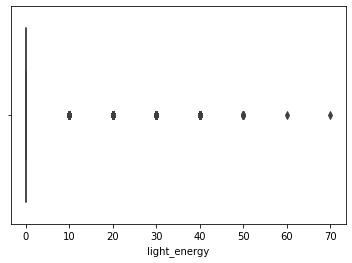

In [12]:
#analysing the lights_energy coloumn
lights_box = sns.boxplot(energy.light_energy)


In [13]:
#Since there are 8 unique Wh values present in the light_energy column, store these in a list
lights = [0, 10, 20, 30, 40, 50, 60, 70]
counts = []                           #store the number of instances per Wh

for i in lights:                                       #for loop that iterates over each value in l, calculates the total number
    a = (energy.light_energy == i).sum()        #of instances for each value in lights, and appends that number to counts
    counts.append(a)

print(counts)                                      #[15252, 2212, 1624, 559, 77, 9, 1, 1]- shows majority is zero value

[15252, 2212, 1624, 559, 77, 9, 1, 1]


Text(0.5, 1.0, 'Distribution of Electrical Energy Consumed by Lights')

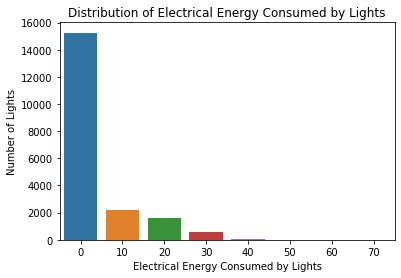

In [14]:
#Plot a bar graph to better understand the distribution of the light_energy column using seaborn
lights = sns.barplot(x = lights, y = counts)
lights.set_xlabel('Electrical Energy Consumed by Lights')
lights.set_ylabel('Number of Lights')
lights.set_title('Distribution of Electrical Energy Consumed by Lights')

In [15]:
#counting the distinct values of electrical consumption through use of electrical lights
energy['light_energy'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: light_energy, dtype: int64

#Data_Visualisation

In [16]:
# To understand the timeseries variation of the applaince energy consumption using the energy_1 dataset
visData = go.Scatter( x= energy_1.date, y = energy_1.app_energy, mode = "markers", marker=dict(color=4))
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'),\
                   paper_bgcolor='rgba(0,0,0,0)',\
                   plot_bgcolor='rgba(0,0,0,0)',title_font_color="red", title_x=0.7)
fig = go.Figure(data=[visData],layout=layout)
iplot(fig)

#Adding column to mark weekdays (0) and weekends(1) for time series evaluation (in the energy_1 dataset copy saved earlier)

In [17]:
energy_1['WEEKDAY'] = ((pd.to_datetime(energy_1['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
energy_1['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [18]:
#alternately can find the same from energy dataset as well
c= (energy['weekday']// 5 == 1).value_counts()
print (c)

False    14263
True      5472
Name: weekday, dtype: int64


In [19]:
# Find rows with weekday 
t_weekday =  energy_1[energy_1['WEEKDAY'] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= t_weekday.date  ,  mode = "markers", y = t_weekday.app_energy, marker=dict(color=4))
layout = go.Layout(title = 'Appliance Energy Consumption Measurement on Weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'),\
                   paper_bgcolor='rgba(0,0,0,0)', \
                   plot_bgcolor='rgba(0,0,0,0)',title_font_color="green", title_x=0.7)
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [20]:
t_weekend =  energy_1[energy_1 ['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= t_weekend.date  ,  mode = "markers", y = t_weekend.app_energy )
layout = go.Layout(title = 'Appliance Energy Consumption Measurement on Weekends' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'),\
                   paper_bgcolor='rgba(0,0,0,0)', \
                   plot_bgcolor='rgba(0,0,0,0)',title_font_color="green", title_x=0.7)
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [21]:
# Functions to be used from the plots - using the energy dataset 

def daily(x,df=energy):
    return df.groupby('weekday')[x].mean()

def hourly(x,df=energy):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=energy):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

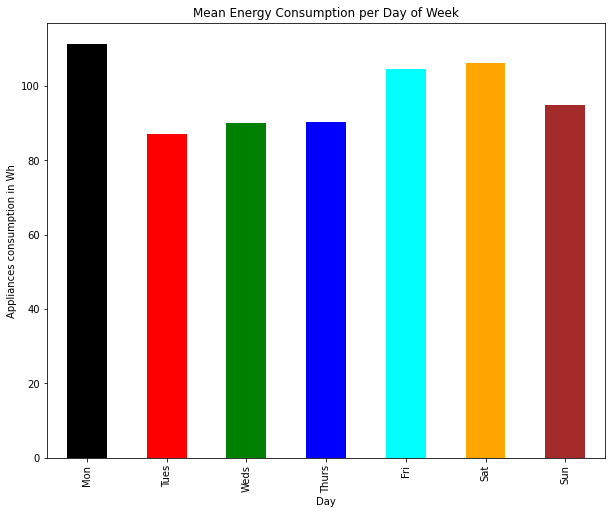

In [22]:
# Plot of Mean Energy Consumption per Day of Week
daily('app_energy').plot(kind = 'bar', figsize=(10,8), color=['black', 'red', 'green', 'blue', 'cyan','orange','brown'])
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);



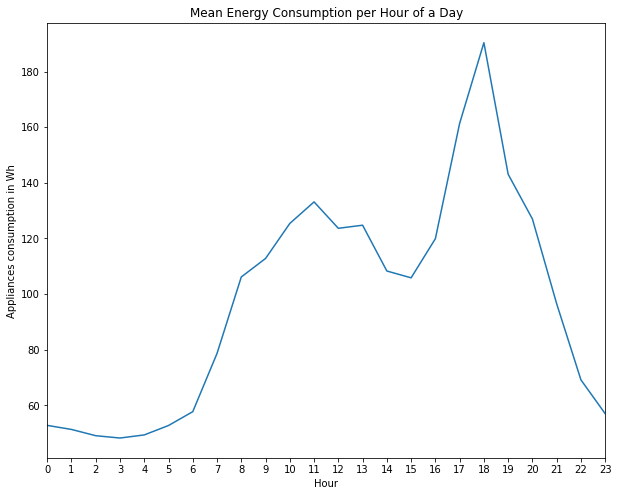

In [23]:
# Plot of Mean Energy Consumption per Hour of a Day

hourly('app_energy').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

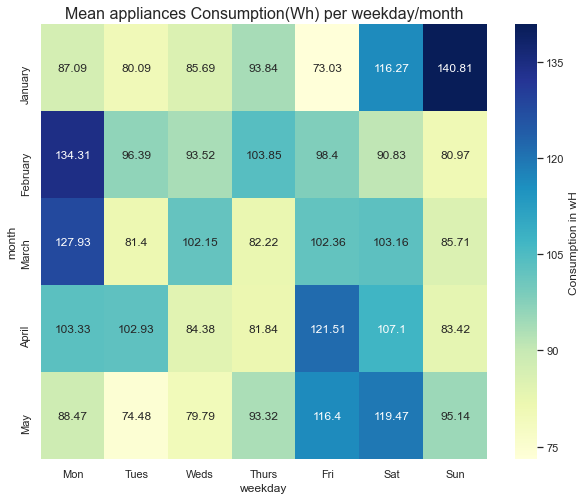

In [24]:
# Heatmap: Mean consumption per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('app_energy').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('16')

plt.show()

The number of appliances with top 0.1% load values are  21 and they have power load higher than 780 Wh.
Mean consumption across the applicances is : 97.6949581960983
Median is : 60.0


Text(0.5, 1.0, 'Appliances energy consumption distribution')

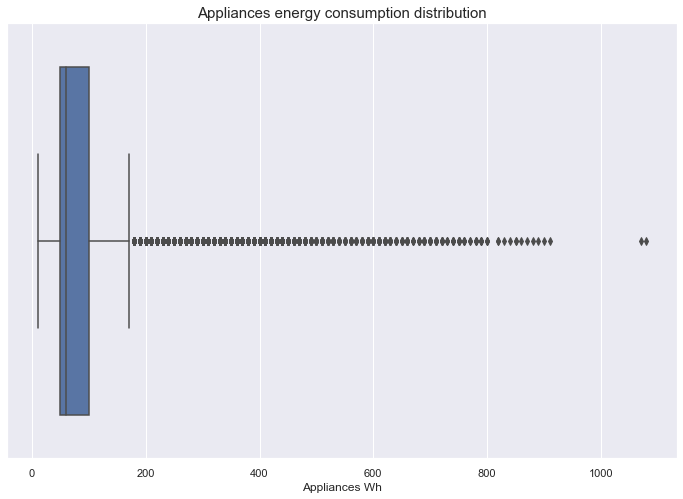

In [25]:
# Find outliers in the energy dataset
sorted_appliances = energy.sort_values('app_energy',ascending=False)
print("The number of appliances with top 0.1% load values are ",
      len(sorted_appliances.head(len(sorted_appliances)//900)),"and they have power load higher than",
      sorted_appliances.app_energy[21], "Wh.")

#print(sorted_appliances.head(50))
print('Mean consumption across the applicances is :', np.mean(energy['app_energy']))
print("Median is :", np.median(energy['app_energy']))

# boxplot appliances
plt.figure(figsize=(12,8))
sns.boxplot(x="app_energy", data=energy)
plt.xlabel('Appliances Wh', fontsize=12)
plt.title("Appliances energy consumption distribution", fontsize=15)

In [26]:
# Outliers removal - new dataset is energy_a
energy_a = energy.drop(energy[(energy.app_energy>790)|(energy.app_energy<0)].index)
energy_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
app_energy      19718 non-null int64
light_energy    19718 non-null int64
kitchen_t       19718 non-null float64
kitchen_h       19718 non-null float64
liv_t           19718 non-null float64
liv_h           19718 non-null float64
laun_t          19718 non-null float64
laun_h          19718 non-null float64
off_t           19718 non-null float64
off_hum         19718 non-null float64
bath_t          19718 non-null float64
bath_h          19718 non-null float64
out_build_t     19718 non-null float64
out_build_h     19718 non-null float64
iron_t          19718 non-null float64
iron_h          19718 non-null float64
teen_t          19718 non-null float64
teen_h          19718 non-null float64
par_t           19718 non-null float64
par_h           19718 non-null float64
out_t           19718 non-null float64
out_press       19718 non-null float64
ou

In [27]:
energy_a=energy_a.drop("month",axis=1)
energy_a=energy_a.drop("weekday",axis=1)
energy_a=energy_a.drop("week",axis=1)

In [28]:
energy_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 29 columns):
app_energy      19718 non-null int64
light_energy    19718 non-null int64
kitchen_t       19718 non-null float64
kitchen_h       19718 non-null float64
liv_t           19718 non-null float64
liv_h           19718 non-null float64
laun_t          19718 non-null float64
laun_h          19718 non-null float64
off_t           19718 non-null float64
off_hum         19718 non-null float64
bath_t          19718 non-null float64
bath_h          19718 non-null float64
out_build_t     19718 non-null float64
out_build_h     19718 non-null float64
iron_t          19718 non-null float64
iron_h          19718 non-null float64
teen_t          19718 non-null float64
teen_h          19718 non-null float64
par_t           19718 non-null float64
par_h           19718 non-null float64
out_t           19718 non-null float64
out_press       19718 non-null float64
ou

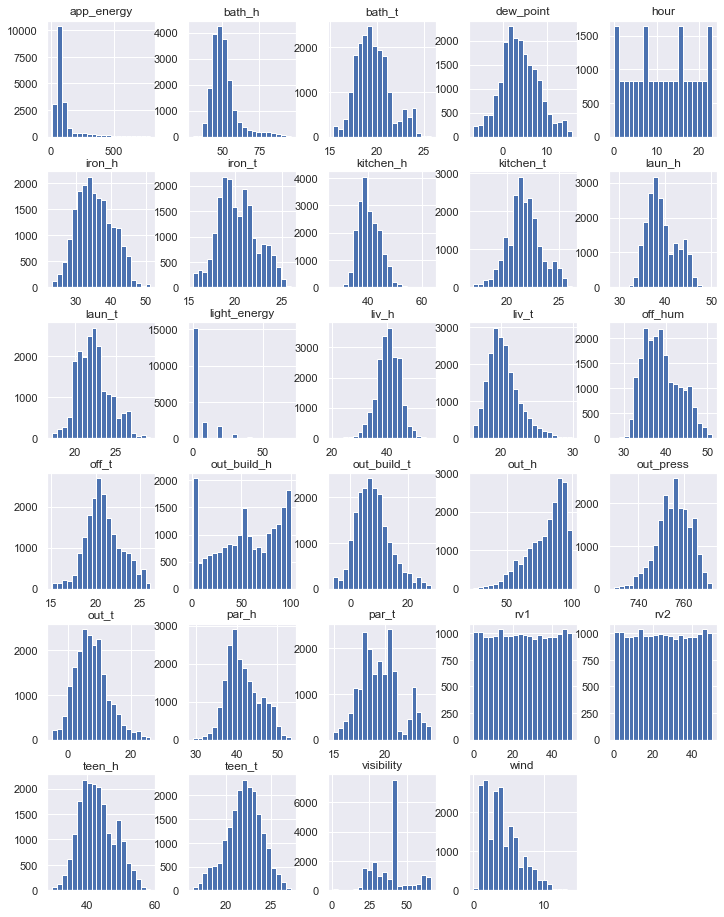

In [29]:
# Histogram of all the features to understand the distribution
energy_a.hist(bins = 20 , figsize= (12,16)) ;

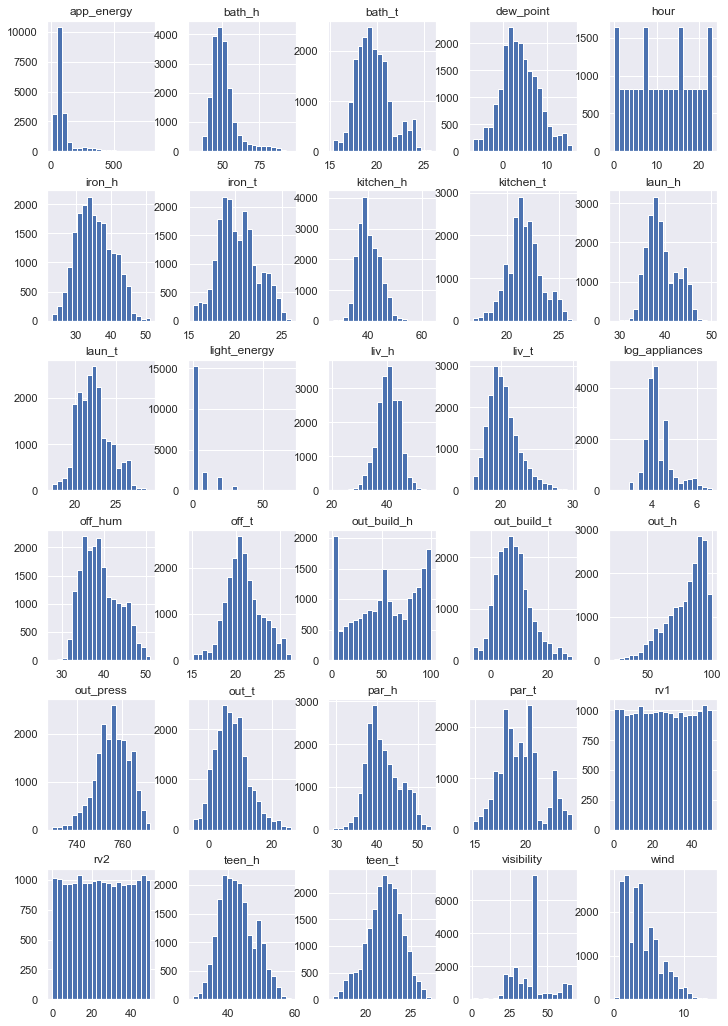

In [30]:
energy_a['log_appliances'] = np.log(energy_a.app_energy) 
#energy_a.info()
energy_a.hist(bins = 20 , figsize= (12,18)) ;

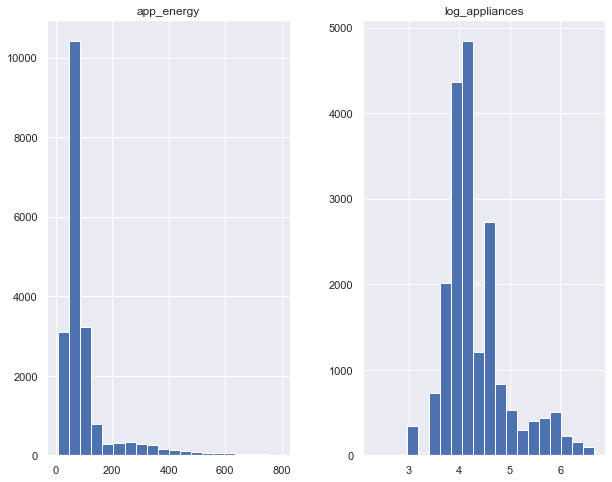

In [31]:
appliance = ["app_energy","log_appliances"]
energy_a[appliance].hist(bins = 20 ) ;



In [32]:
energy_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 30 columns):
app_energy        19718 non-null int64
light_energy      19718 non-null int64
kitchen_t         19718 non-null float64
kitchen_h         19718 non-null float64
liv_t             19718 non-null float64
liv_h             19718 non-null float64
laun_t            19718 non-null float64
laun_h            19718 non-null float64
off_t             19718 non-null float64
off_hum           19718 non-null float64
bath_t            19718 non-null float64
bath_h            19718 non-null float64
out_build_t       19718 non-null float64
out_build_h       19718 non-null float64
iron_t            19718 non-null float64
iron_h            19718 non-null float64
teen_t            19718 non-null float64
teen_h            19718 non-null float64
par_t             19718 non-null float64
par_h             19718 non-null float64
out_t             19718 non-null float64

In [33]:
# finding correlatin matrix of all the attributes
energy_a.corr()

app_energy  light_energy  kitchen_t  kitchen_h     liv_t  \
app_energy        1.000000      0.198201   0.058996   0.087890  0.122590   
light_energy      0.198201      1.000000  -0.022727   0.107266 -0.004990   
kitchen_t         0.058996     -0.022727   1.000000   0.163976  0.836827   
kitchen_h         0.087890      0.107266   0.163976   1.000000  0.269801   
liv_t             0.122590     -0.004990   0.836827   0.269801  1.000000   
liv_h            -0.058680      0.051428  -0.002565   0.797675 -0.165586   
laun_t            0.088211     -0.096397   0.892423   0.253182  0.735194   
laun_h            0.037644      0.131253  -0.028357   0.844803  0.121740   
off_t             0.043280     -0.008049   0.876984   0.105981  0.761939   
off_hum           0.017365      0.115113   0.098001   0.880435  0.231678   
bath_t            0.023048     -0.078044   0.885198   0.205852  0.720483   
bath_h            0.010296      0.141706  -0.014878   0.303246  0.029624   
out_build_t       0.121284     -0.078204   0.654770   0.315978  0.801244   
out_build_h      -0.086414      0.152968  -0.614825   0.245514 -0.580134   
iron_t            0.028316     -0.134699   0.838569   0.021305  0.663438   
iron_h           -0.055987      0.035323   0.135179   0.801155  0.229214   
teen_t            0.042690     -0.070743   0.825418  -0.030178  0.578085   
teen_h           -0.095707      0.012999  -0.006212   0.736238  0.068684   
par_t             0.012986     -0.156734   0.844707   0.115160  0.675357   
par_h            -0.052405     -0.008539   0.071834   0.763981  0.157388   
out_t             0.102671     -0.073683   0.682862   0.340586  0.792340   
out_press        -0.039059     -0.011491  -0.149993  -0.293908 -0.132719   
out_h            -0.155689      0.068215  -0.345160   0.274344 -0.505242   
wind              0.090528      0.060741  -0.087680   0.204946  0.052724   
visibility       -0.004157      0.019347  -0.075679  -0.020756 -0.069587   
dew_point         0.017180     -0.035632   0.571435   0.639078  0.582594   
rv1              -0.012404      0.000627  -0.006107  -0.000530 -0.010844   
rv2              -0.012404      0.000627  -0.006107  -0.000530 -0.010844   
hour              0.219468      0.255219   0.178995   0.018695  0.254971   
log_appliances    0.904056      0.261356   0.162862   0.084759  0.215863   

                   liv_h    laun_t    laun_h     off_t   off_hum  ...  \
app_energy     -0.058680  0.088211  0.037644  0.043280  0.017365  ...   
light_energy    0.051428 -0.096397  0.131253 -0.008049  0.115113  ...   
kitchen_t      -0.002565  0.892423 -0.028357  0.876984  0.098001  ...   
kitchen_h       0.797675  0.253182  0.844803  0.105981  0.880435  ...   
liv_t          -0.165586  0.735194  0.121740  0.761939  0.231678  ...   
liv_h           1.000000  0.137318  0.678418 -0.047445  0.721560  ...   
laun_t          0.137318  1.000000 -0.011087  0.852852  0.122852  ...   
laun_h          0.678418 -0.011087  1.000000 -0.140469  0.899024  ...   
off_t          -0.047445  0.852852 -0.140469  1.000000 -0.048743  ...   
off_hum         0.721560  0.122852  0.899024 -0.048743  1.000000  ...   
bath_t          0.110415  0.888290 -0.049798  0.871788  0.092013  ...   
bath_h          0.250066 -0.066456  0.375362 -0.076681  0.352554  ...   
out_build_t    -0.009877  0.686719  0.076876  0.652214  0.258969  ...   
out_build_h     0.390321 -0.647328  0.515124 -0.703042  0.392502  ...   
iron_t         -0.051459  0.847395 -0.249982  0.877688 -0.131189  ...   
iron_h          0.690644  0.172636  0.832711  0.043341  0.894280  ...   
teen_t         -0.041179  0.795284 -0.283091  0.796220 -0.167019  ...   
teen_h          0.679836  0.044632  0.828808 -0.095246  0.847208  ...   
par_t           0.054441  0.901417 -0.195199  0.889383 -0.044528  ...   
par_h           0.676492  0.134633  0.833593 -0.025754  0.856563  ...   
out_t           0.033439  0.699277  0.118229  0.663333  0.293228  ...   
out_press      -0.255419 -0.189364 -0.233397 -0.07485

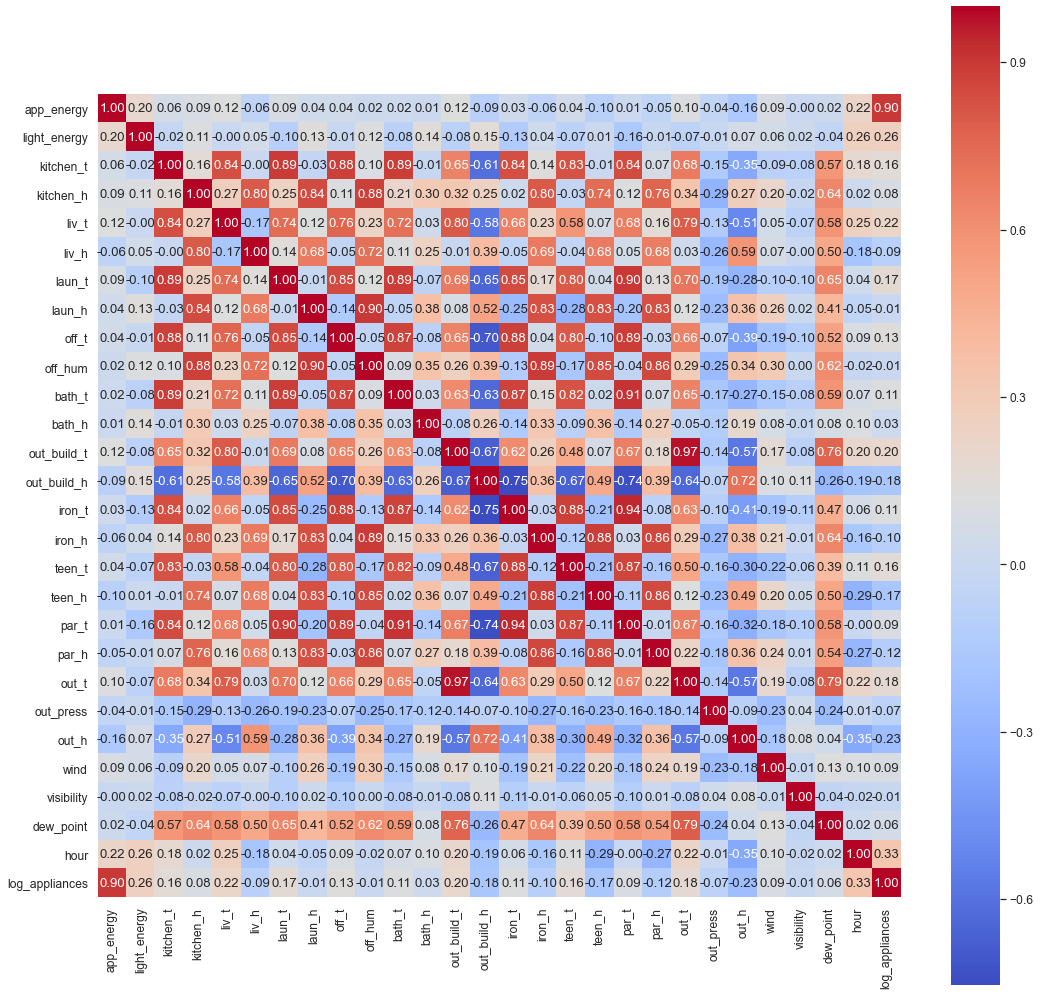

In [34]:
#Ploting correlation matrix

col = ['app_energy', 'light_energy', 'kitchen_t', 'kitchen_h', 'liv_t', 'liv_h', 'laun_t', 'laun_h', 'off_t',
       'off_hum', 'bath_t', 'bath_h', 'out_build_t', 'out_build_h', 'iron_t', 'iron_h', 'teen_t', 'teen_h', 'par_t',
       'par_h', 'out_t', 'out_press', 'out_h', 'wind', 'visibility', 'dew_point','hour','log_appliances']
corr=energy_a[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1.1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f',cmap="coolwarm", xticklabels=col, yticklabels=col)
plt.show();

#Checking for correlation with log_appliances

In [35]:
energy_a[energy_a.columns[:]].corr()['log_appliances'][:]

app_energy        0.904056
light_energy      0.261356
kitchen_t         0.162862
kitchen_h         0.084759
liv_t             0.215863
liv_h            -0.092709
laun_t            0.168772
laun_h           -0.006320
off_t             0.134139
off_hum          -0.006633
bath_t            0.112171
bath_h            0.025979
out_build_t       0.198031
out_build_h      -0.175739
iron_t            0.112015
iron_h           -0.096342
teen_t            0.155901
teen_h           -0.166129
par_t             0.094428
par_h            -0.116199
out_t             0.177690
out_press        -0.074650
out_h            -0.227358
wind              0.088812
visibility       -0.013125
dew_point         0.057205
rv1              -0.010784
rv2              -0.010784
hour              0.334117
log_appliances    1.000000
Name: log_appliances, dtype: float64

#Linear Regression

#For the linear regression model, i choosed independent features but highly correlated with appliances' consumption, based on Pearson correlation 

In [247]:
# Linear model
model0 = ['light_energy', 'kitchen_t', 'liv_t', 'laun_t', 'out_build_t', 'out_build_h', 'out_t', 'out_h']
model2 =[ 'light_energy', 'kitchen_t', 'kitchen_h', 'liv_t', 'liv_h', 'laun_t', 'laun_h', 'off_t',
       'off_hum', 'bath_t', 'bath_h', 'out_build_t', 'out_build_h', 'iron_t', 'iron_h', 'teen_t', 'teen_h', 'par_t',
       'par_h', 'out_t', 'out_press', 'out_h', 'wind', 'visibility', 'dew_point','hour']
model1 =['light_energy', 'kitchen_t', 'kitchen_h', 'liv_t', 'liv_h', 'laun_t', 'laun_h', 'off_t',
       'off_hum', 'bath_t', 'bath_h', 'out_build_t', 'out_build_h', 'iron_t', 'iron_h', 'teen_t', 'teen_h', 'par_t',
       'par_h', 'out_t', 'out_press','out_h','hour']
model3 =[ 'light_energy', 'kitchen_t', 'kitchen_h', 'liv_t', 'liv_h', 'laun_t', 'laun_h', 'off_t',
       'off_hum', 'bath_t', 'bath_h', 'out_build_t', 'out_build_h', 'out_t','out_h','hour']# 'iron_t', 'iron_h', 'teen_t', 'teen_h', 'par_t','par_h', 'out_press'
# to avoid warnings from standardscaler
energy_a.light_energy = energy_a.light_energy.astype(float)
energy_a.kitchen_t = energy_a.kitchen_t.astype(float)
energy_a.liv_t = energy_a.liv_t.astype(float)
energy_a.laun_t = energy_a.laun_t.astype(float)
energy_a.out_build_t = energy_a.out_build_t.astype(float)
energy_a.out_build_h = energy_a.out_build_h.astype(float)
energy_a.out_t = energy_a.out_t.astype(float)
energy_a.out_h = energy_a.out_h.astype(float)


In [248]:
# Creation of train/test sets for the model

test_size=.2
test_index = int(len(energy_a.dropna())*(1-test_size))

# Linear model
X1_train, X1_test = energy_a[model1].iloc[:test_index,], energy_a[model1].iloc[test_index:,]
y1_train = energy_a.log_appliances.iloc[:test_index,]
y_test =  energy_a.log_appliances.iloc[test_index:,]

In [249]:
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for the model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [250]:
#training the model with default parameters

from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train,y1_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Model Evaluation

In [251]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate the model - can be used for several models

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [252]:
evaluate(lin_model, X1_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Average Error       : 0.3828 degrees
Variance score R^2  : 15.10%
Accuracy            : 91.33%



In [271]:
y1_pred = lin_model.predict(X1_test)
y1_coef=lin_model.coef_

print(y1_pred)
print('---------------------------')
print('The coefficients of the linear model are:\n', y1_coef)

[4.14441154 4.1605023  4.17104737 ... 4.73641258 4.65895403 4.55263956]
---------------------------
The coefficients of the linear model are:
 [ 0.13743951 -0.03921942  0.31272162 -0.12193921 -0.26992663  0.25950259
  0.15041749 -0.03082231 -0.08351263 -0.00900891  0.01608426  0.26876034
  0.08070377 -0.04112035  0.01496829  0.1659954  -0.23588592 -0.11167002
 -0.02004697 -0.15330683 -0.0089717   0.01038214  0.07487808]


[Text(0, 0.5, 'Y Test-Y Pred')]

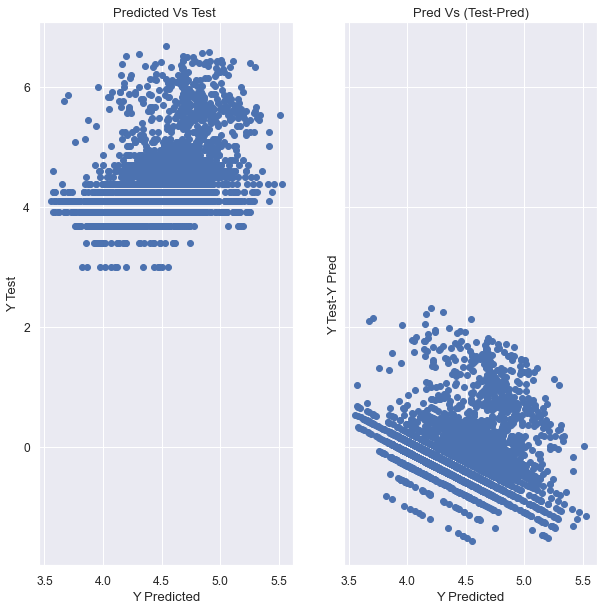

In [254]:
fig, axs = plt.subplots(1, 2, figsize=(10,10), sharey=True)
axs[0].scatter(y1_pred,y_test)
axs[0].set_title('Predicted Vs Test ')
axs[1].scatter(y1_pred,y_test-y1_pred)
axs[1].set_title('Pred Vs (Test-Pred)')

plt.setp(axs[0], xlabel='Y Predicted')
plt.setp(axs[1], xlabel='Y Predicted')

plt.setp(axs[0], ylabel='Y Test')
plt.setp(axs[1], ylabel='Y Test-Y Pred')

[Text(0, 0.5, 'Y Test -Y Pred')]

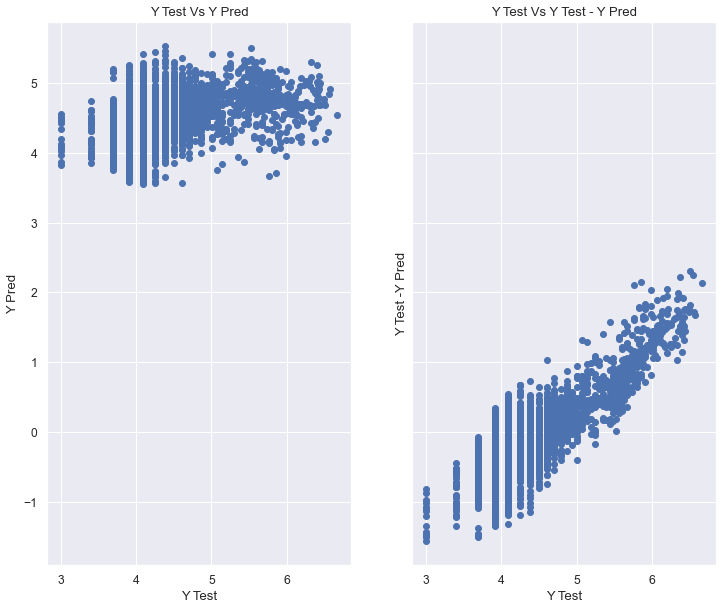

In [255]:
fig, axs = plt.subplots(1, 2, figsize=(12,10), sharey=True)
axs[0].scatter(y_test,y1_pred)
axs[0].set_title('Y Test Vs Y Pred')

axs[1].scatter(y_test,y_test-y1_pred)
axs[1].set_title('Y Test Vs Y Test - Y Pred')

plt.setp(axs[0], xlabel='Y Test')
plt.setp(axs[1], xlabel='Y Test')

plt.setp(axs[0], ylabel='Y Pred')
plt.setp(axs[1], ylabel='Y Test -Y Pred')

Text(0, 0.5, 'Values')

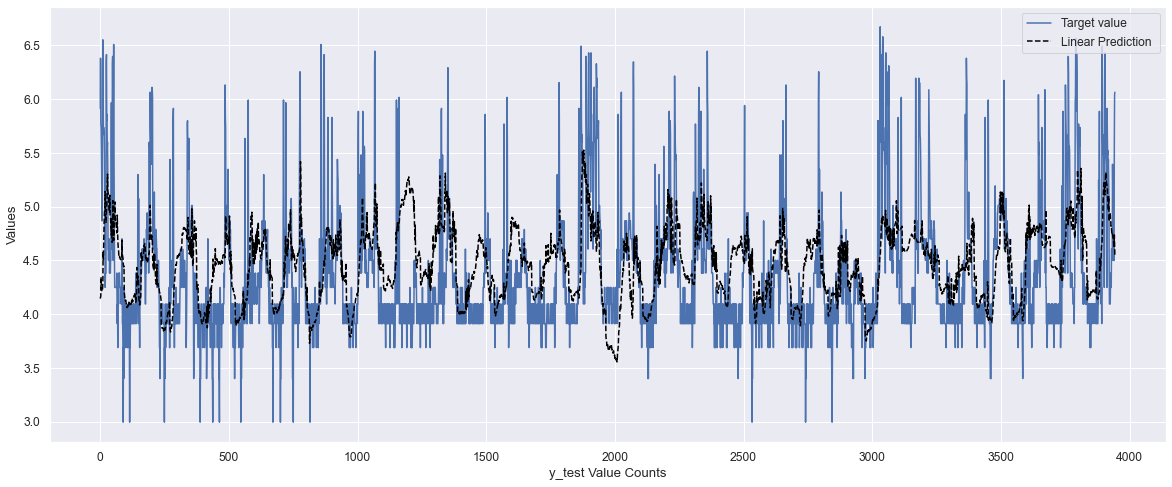

In [263]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values,label='Target value',color='b')
plt.plot(y1_pred,label='Linear Prediction ', linestyle='--', color='black')

plt.legend(loc=1)
plt.xlabel('y_test Value Counts')
plt.ylabel('Values')